<a href="https://colab.research.google.com/github/Requenamar3/Data-Mining/blob/main/Data_Mining_Module1_Ecommerce_CLV%20filtered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Lifetime Value model

In [1]:
#package used for customer lifetime value modeling
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00


In [2]:
 # installing the pandas_profiling package for data analysis and generating statistical report summaries.
!pip install ydata_profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 28.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=02ed19a859b66b7f65751d55527ac5d96789fa23df24da14843b87994110aa91
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling 

In [3]:
# Customer Lifetime Value (CLV or CLTV)
# Buy till you die... (BG/NBD)

# Import the lifetimes package for customer lifetime value analysis.
import lifetimes
# Import pandas for data manipulation and analysis.
import pandas as pd
# Import numpy for numerical computing.
import numpy as np
# Import datetime for handling dates and times.
import datetime as dt
# Import matplotlib.pyplot for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt
# Import seaborn for making statistical graphics.
import seaborn as sns
# Import BetaGeoFitter from lifetimes for fitting the BG/NBD model.
from lifetimes import BetaGeoFitter
# Import GammaGammaFitter from lifetimes for fitting the Gamma-Gamma model.
from lifetimes import GammaGammaFitter
# Import plot_frequency_recency_matrix for visualizing the relationship between frequency and recency.
from lifetimes.plotting import plot_frequency_recency_matrix

# Set pandas display options to improve the readability of output.
# Set the maximum number of rows to display to 500.
pd.set_option('display.max_rows', 500)
# Set the maximum number of columns to display to 500.
pd.set_option('display.max_columns', 500)
# Set the width of the display in characters to 1000.
pd.set_option('display.width', 1000)


In [4]:
#Import the ProfileReport .For creating comprehensive exploratory data analysis reports.
from ydata_profiling import ProfileReport

In [48]:
EC= pd.read_csv("https://raw.githubusercontent.com/Requenamar3/Data-Mining/main/sales_2023-10-01_2024-03-06.csv")

In [6]:
EC.head()

,month,financial_status,order_name,customer_email,customer_id,customer_type,variant_sku,product_price,product_title,shipping_region,shipping_postal_code,customer_cohort_week,customer_cohort_quarter,customer_cohort_month,product_type,total_sales,net_sales,total_cost,units_per_transaction
0,2023-10,paid,#805723,mayapriebe33@gmail.com,6616065245299,Returning,SQ9178530,0.00,Bloomsy Original (Ships every 1 Months),Colorado,80525,2023-W19,2023-04,2023-05,NaN,0.00,0.00,0.0,1
1,2023-10,partially_refunded,#810617,vincent.nicolais@yahoo.com,6261751251059,Returning,NaN,0.00,NaN,Georgia,31820,2022-W41,2022-10,2022-10,NaN,83.88,0.00,0.0,0
2,2023-10,partially_refunded,#810617,vincent.nicolais@yahoo.com,6261751251059,Returning,SQ8862610,642.99,Bloomsy Premium,Georgia,31820,2022-W41,2022-10,2022-10,NaN,694.43,642.99,0.0,1
3,2023-10,partially_refunded,#810431,cjsherrillmain@gmail.com,3496267448435,Returning,SQ1726938,69.99,Bloomsy Deluxe,Maryland,20636,2020-W48,2020-10,2020-11,NaN,74.19,69.99,0.0,1
4,2023-10,partially_refunded,#810431,cjsherrillmain@gmail.com,3496267448435,Returning,NaN,0.00,NaN,Maryland,20636,2020-W48,2020-10,2020-11,NaN,-10.60,-10.60,0.0,0


In [7]:
EC.columns

Index(['month', 'financial_status', 'order_name', 'customer_email', 'customer_id', 'customer_type', 'variant_sku', 'product_price', 'product_title', 'shipping_region', 'shipping_postal_code', 'customer_cohort_week', 'customer_cohort_quarter', 'customer_cohort_month', 'product_type', 'total_sales', 'net_sales', 'total_cost', 'units_per_transaction'], dtype='object')

In [49]:
EC= pd.read_csv("https://raw.githubusercontent.com/Requenamar3/Data-Mining/main/sales_2023-10-01_2024-03-06.csv",usecols=['customer_id', 'order_name','variant_sku','month', 'customer_cohort_month', 'total_sales', 'units_per_transaction'])

In [9]:
EC.head()


,month,order_name,customer_id,variant_sku,customer_cohort_month,total_sales,units_per_transaction
0,2023-10,#805723,6616065245299,SQ9178530,2023-05,0.00,1
1,2023-10,#810617,6261751251059,NaN,2022-10,83.88,0
2,2023-10,#810617,6261751251059,SQ8862610,2022-10,694.43,1
3,2023-10,#810431,3496267448435,SQ1726938,2020-11,74.19,1
4,2023-10,#810431,3496267448435,NaN,2020-11,-10.60,0


In [10]:
# Create a ProfileReport object
profile = ProfileReport(EC, title="EC CLV", explorative=True)

In [11]:
# display report
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
# Remove rows from 'EC' where 'total_sales' is equal to 0.00
EC = EC[EC['total_sales'] != 0.00]


In [51]:
# Remove records with 0 orders qty
EC = EC[EC['units_per_transaction'] != 0]


In [14]:
EC.head()

,month,order_name,customer_id,variant_sku,customer_cohort_month,total_sales,units_per_transaction
2,2023-10,#810617,6261751251059,SQ8862610,2022-10,694.43,1
3,2023-10,#810431,3496267448435,SQ1726938,2020-11,74.19,1
8,2023-10,#802622,5601422671987,BB738-24,2022-03,54.49,1
11,2023-10,#801731,6769237557363,BB727-26,2023-07,64.34,1
13,2023-10,#807669,6272794919027,BB944-24,2022-10,63.74,1


In [15]:
EC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44231 entries, 2 to 158180
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  44231 non-null  object 
 1   order_name             44231 non-null  object 
 2   customer_id            44231 non-null  int64  
 3   variant_sku            44214 non-null  object 
 4   customer_cohort_month  44231 non-null  object 
 5   total_sales            44231 non-null  float64
 6   units_per_transaction  44231 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.7+ MB


In [17]:
EC.isnull().sum()

month                     0
order_name                0
customer_id               0
variant_sku              17
customer_cohort_month     0
total_sales               0
units_per_transaction     0
dtype: int64

In [52]:
EC.dropna(inplace=True)  # inplace=True means we dropped them permanently

In [53]:
EC.isnull().sum()

month                    0
order_name               0
customer_id              0
variant_sku              0
customer_cohort_month    0
total_sales              0
units_per_transaction    0
dtype: int64

In [54]:
EC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44214 entries, 2 to 158180
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  44214 non-null  object 
 1   order_name             44214 non-null  object 
 2   customer_id            44214 non-null  int64  
 3   variant_sku            44214 non-null  object 
 4   customer_cohort_month  44214 non-null  object 
 5   total_sales            44214 non-null  float64
 6   units_per_transaction  44214 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.7+ MB


In [21]:
EC.describe()

,customer_id,total_sales,units_per_transaction
count,4.421400e+04,44214.000000,44214.000000
mean,5.562729e+12,117.220923,1.005406
std,1.682923e+12,149.469024,0.084234
min,1.183560e+12,0.220000,1.000000
25%,5.028425e+12,49.530000,1.000000
50%,6.368478e+12,59.600000,1.000000
75%,6.996533e+12,84.790000,1.000000
max,7.301131e+12,3507.540000,5.000000


***find_boundaries*** function: Calculates upper and lower boundaries (quantiles) for a given variable in the DataFrame.

**capping_outliers function:** Caps outliers in a given variable of the DataFrame by replacing values beyond the upper and lower boundaries with those boundaries.

*These functions are designed to efficiently handle outlier treatment in a DataFrame, making the code concise and easy to understand.*

Outliers are replaced with the upper and lower boundaries calculated based on default quantiles (5th and 95th percentiles).

In [55]:
def find_boundaries(df, variable,q1=0.05,q2=0.95):
    # the boundaries are the quantiles
    lower_boundary = df[variable].quantile(q1) # lower quantile
    upper_boundary = df[variable].quantile(q2) # upper quantile
    return upper_boundary, lower_boundary
def capping_outliers(df,variable):
    upper_boundary,lower_boundary =  find_boundaries(df,variable)
    df[variable] = np.where(df[variable] > upper_boundary, upper_boundary,
                       np.where(df[variable] < lower_boundary, lower_boundary, df[variable]))

In [23]:
# Function to cap outliers in the 'Total_sales'
capping_outliers(EC, 'total_sales')

# Function to cap outliers in the 'units_per_transaction'
capping_outliers(EC, 'units_per_transaction')


In [56]:
EC.describe()

,customer_id,total_sales,units_per_transaction
count,4.421400e+04,44214.000000,44214.000000
mean,5.562729e+12,117.220923,1.005406
std,1.682923e+12,149.469024,0.084234
min,1.183560e+12,0.220000,1.000000
25%,5.028425e+12,49.530000,1.000000
50%,6.368478e+12,59.600000,1.000000
75%,6.996533e+12,84.790000,1.000000
max,7.301131e+12,3507.540000,5.000000


The average of sales ammount per transaction is around 110. The high standard deviation of 118 indicates the sales amounts vary. The minimum sales is 42.49 and the maximum 498.94. A quater of the transactions are relatively small in total sales. The median indicates that most customers are spending around $59.60 per transaction. This is valuable information for understanding customer behavior, planning inventory and supply chain management, or developing marketing and sales strategies aimed at the most common transaction size.

**Customer Behavior**: Most customers are spending around $59.60 per transaction .This can help us making decisions about product pricing, promotions, and product bundles to cater to the spending habits of the majority.

**Marketing Strategies**: Marketing efforts can be tailored to the average customer's spending. If most customers spend around $59.60, marketing can highlight products or deals around this price. Upselling strategies could focus on slightly higher-priced items to increase the average spend.
We could recommend additional purchases of accesories, with the goal of slightly increasing the average spend per customer.

#Recency Frecuency Time

In [57]:
# Calculate the unit price
EC['UnitPrice'] = EC['total_sales'] // EC['units_per_transaction']


In [58]:
EC.columns

Index(['month', 'order_name', 'customer_id', 'variant_sku', 'customer_cohort_month', 'total_sales', 'units_per_transaction', 'UnitPrice'], dtype='object')

Using the lifetime package to analyse historical customer transactions data to predict future purchasing behavior.

In [59]:
# generate a sumary df called clv that agreagates transaction data by customers until 3/5/24
clv = lifetimes.utils.summary_data_from_transaction_data(EC,'customer_id','month','total_sales',observation_period_end='2024-03-05')

The summary_data_from_transaction_data function will calculate:

**Frequency:** The number of repeat purchases made by a customer. This is calculated as the total number of purchases minus one, considering the first purchase as a non-repeat purchase.

**Recency**: The age of a customer when they made their most recent purchase. This is calculated as the time between the first purchase and the last purchase.

**T:** The age of the customer in terms of the analysis time frame, calculated as the time between the first purchase and the end of the observation period.

**Monetary value: **An average value of the customer's transactions, typically calculated excluding the first purchase.

In [60]:
clv.head()

,frequency,recency,T,monetary_value
customer_id,,,,
1183559942259,2.0,62.0,95.0,85.59
1183569084531,1.0,30.0,125.0,34.99
1183569707123,5.0,152.0,156.0,47.07
1183569805427,0.0,0.0,64.0,0.00
1183579504755,0.0,0.0,64.0,0.00


In [61]:
# let's filter so that we only catch customers who have made more than 1 purchase
clv = clv[clv['frequency']>1]

**Customer 1183559942259:** Two repeat purchases over 95 months with an average spend of 85.59 per purchase.

**Customer 1183569084531:**One repeat purchase over 125 months, averaging 42.79 spent.

**Customer 1183569070123:** Five repeat purchases, customer for 156 months, spending 47.07 on average.

**Customers 1183569085427 & 1183579504755**:  No repeat purchases; average spend is 0.00.

The presence of customers with repeat transactions suggests successful repeat business.Customers with high average transaction values contribute positively to revenue.Zero repeat purchases for some customers highlight possible retention issues, suggesting a need for improved engagement and retention strategies.

In [62]:
clv.head()

,frequency,recency,T,monetary_value
customer_id,,,,
1183559942259,2.0,62.0,95.0,85.59
1183569707123,5.0,152.0,156.0,47.07
1183582322803,4.0,123.0,156.0,53.49
1183584551027,5.0,152.0,156.0,43.79
1183594184819,5.0,152.0,156.0,43.99


#BG/NBD Model

Initializes and fits the Beta-Geometric/Beta-Binomial (BG/NBD) model to the provided summary statistics. These statistics include the frequency (number of repeat transactions), recency (age at the last transaction), and tenure (age at the end of the observation period) for each customer. The BG/NBD model is a probabilistic model used for predicting customer lifetime value (CLV) and future purchase behavior based on historical transaction data. The penalizer coefficient is specified to prevent overfitting during model fitting.

In [63]:
# Initialize the Beta-Geometric/Beta-Binomial model (BG/NBD) with a penalizer coefficient to avoid overfitting
bgf = BetaGeoFitter(penalizer_coef=0.001)

# Fit the BG/NBD model using the summary statistics: frequency (F), recency (R), and tenure (T)
bgf.fit(
    clv['frequency'],  # Frequency represents the number of repeat transactions
    clv['recency'],    # Recency represents the age of the customer at their last transaction
    clv['T']           # Tenure represents the age of the customer at the end of the observation period
)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<lifetimes.BetaGeoFitter: fitted with 4404 subjects, a: 0.00, alpha: 322.63, b: 0.00, r: 8.02>

Predicts the expected number of purchases for each customer in the next 6 months using the Beta-Geometric/Beta-Binomial (BG/NBD) model. It calculates these predictions based on the customer's historical repeat transaction behavior, considering their frequency (number of repeat transactions), recency (age at their last transaction), and tenure (age at the end of the observation period). Then, it sorts the customers by their expected purchases in descending order and selects the top 5 customers with the highest expected purchases for further analysis or action.

In [64]:
t = 180  # Define the prediction period of 6 months (180 days)

# Predict future purchases for the next 6 months using the BG/NBD model
clv['expected_purc_6_months'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    t,                      # Prediction period
    clv['frequency'],       # Frequency represents the number of repeat transactions
    clv['recency'],         # Recency represents the age of the customer at their last transaction
    clv['T']                # Tenure represents the age of the customer at the end of the observation period
)

# Sort customers by expected purchases in the next 6 months and display the top 5
clv_top5 = clv.sort_values(by='expected_purc_6_months', ascending=False).head(5)


In [65]:
clv_top5

,frequency,recency,T,monetary_value,expected_purc_6_months
customer_id,,,,,
5454865727603,5.0,152.0,156.0,112.384,4.896924
5156199071859,5.0,152.0,156.0,87.088,4.896924
5202694045811,5.0,152.0,156.0,49.150,4.896924
5200096985203,5.0,152.0,156.0,61.708,4.896924
5188042293363,5.0,152.0,156.0,53.490,4.896924


These customers have a consistent purchase pattern: they've all made 5 repeat purchases and their most recent purchase was 152 months after their first one. They've been customers for a total of 156 months, indicating a long-term relationship with the company. Despite the similarities in their purchase frequency and timing, they spend different amounts on average, ranging from about 42 to 60 per transaction. The model predicts that each of these customers will make approximately 4.42 purchases in the upcoming 6 months, a fairly high level of engagement. This uniform prediction suggests that these customers are not only regularly active but are also expected to continue this behavior, making them particularly valuable for future revenue. Their varied monetary values, combined with consistent purchasing behavior, might provide opportunities for targeted marketing strategies to further increase their spend.

#Gamma-Gamma Model

In [66]:
# Calculate and display the correlation between 'frequency' and 'monetary_value' columns in the 'clv' DataFrame.
clv[['frequency', 'monetary_value']].corr()


,frequency,monetary_value
frequency,1.000000,-0.164191
monetary_value,-0.164191,1.000000


The correlation coefficient indicates how two variables move together. A value near 1 means they move in the same direction, near -1 means they move in opposite directions, and around 0 means there's no linear relationship.

The correlation of -0.17 between purchase frequency and average monetary value indicates a minor tendency for customers who purchase more often to spend less per transaction, but this trend is not strongly pronounced and should be interpreted cautiously.

In [67]:
# Initialize GammaGammaFitter with a penalizer to prevent overfitting and fit on frequency and monetary value.
ggf = GammaGammaFitter(penalizer_coef=0.01)  # Create GammaGammaFitter model instance with a specified penalizer.
ggf.fit(clv["frequency"], clv["monetary_value"])  # Fit model to customer data for predicting monetary value.


<lifetimes.GammaGammaFitter: fitted with 4404 subjects, p: 4.36, q: 0.66, v: 4.26>

In [68]:
# Calculate 6-month Customer Lifetime Value (CLV) using the GammaGamma and BetaGeo models, then identify top customers.
# The 'customer_lifetime_value' method from GammaGammaFitter ('ggf') combines both frequency/recency (from 'bgf') and
# monetary value to estimate the CLV for the next 6 months ('time=6'), assuming daily ('freq='D'') transactions.
# A discount rate of 0.01 is applied to account for the time value of money.
clv['six_Months_CLV']=ggf.customer_lifetime_value(bgf,
                                   clv["frequency"],
                                   clv["recency"],
                                   clv["T"],
                                   clv["monetary_value"],
                                   time=6,
                                   freq='D',
                                   discount_rate=0.01)
clv.sort_values('six_Months_CLV',ascending=False).head()

,frequency,recency,T,monetary_value,expected_purc_6_months,six_Months_CLV
customer_id,,,,,,
6569497985139,2.0,123.0,156.0,1834.210,3.768707,6953.516924
6543258091635,5.0,152.0,156.0,1194.816,4.896924,5744.331222
5394003755123,2.0,62.0,95.0,1282.325,4.319171,5574.144856
5419749965939,2.0,91.0,95.0,1180.250,4.319171,5131.169933
5455684370547,2.0,92.0,156.0,1079.405,3.768707,4095.357382


This code calculates a 6-month predicted CLV for each customer, adds these predictions as a new column in the clv DataFrame, and then displays the top 5 customers with the highest predicted CLV values.

Customer ID 6543258091635: A frequent shopper with the highest average spend and projected purchases, making them the most valuable over the next six months.

Customer ID 6569497985139: Not as frequent in purchases but spends a lot when they do; they're expected to continue to be a valuable customer.

Customer ID 5419794965939: Moderately frequent with a good spending average; they're also projected to continue purchasing regularly.

Customer ID 5455684370547: Similar frequency as others but spends less per transaction; still, they're expected to contribute steadily.

Customer ID 5394003755123: Least amount spent on average but anticipated to buy as often as others; their value is lower but not insignificant.

In [69]:
# Segment customers into 4 categories based on their CLV using quartiles.
clv['Segment'] = pd.qcut(clv['six_Months_CLV'], 4, labels=['Hibernating', 'Need Attention', 'Loyal Customers', 'Champions'])  # Assign segments based on CLV quartiles.


In [70]:
clv.head()

,frequency,recency,T,monetary_value,expected_purc_6_months,six_Months_CLV,Segment
customer_id,,,,,,,
1183559942259,2.0,62.0,95.0,85.59,4.319171,380.673435,Champions
1183569707123,5.0,152.0,156.0,47.07,4.896924,230.228838,Need Attention
1183582322803,4.0,123.0,156.0,53.49,4.520851,242.920620,Need Attention
1183584551027,5.0,152.0,156.0,43.79,4.896924,214.470774,Hibernating
1183594184819,5.0,152.0,156.0,43.99,4.896924,215.431631,Hibernating


In [71]:
# Calculate the mean of each column within the 'clv' DataFrame grouped by 'Segment'.
clv.groupby('Segment').mean()


,frequency,recency,T,monetary_value,expected_purc_6_months,six_Months_CLV
Segment,,,,,,
Hibernating,3.751805,117.262635,155.081227,46.938404,4.435843,210.349866
Need Attention,3.990868,125.260274,154.336073,54.071226,4.532235,245.811126
Loyal Customers,3.347273,106.170000,136.320909,66.818285,4.453892,300.459738
Champions,3.582198,117.509537,145.413261,151.130717,4.460049,663.141675


In [72]:
# Calculate the mean of each column within the 'clv' DataFrame grouped by 'Segment'.
segment_means = clv.groupby('Segment').mean()

# count the number of customers in each 'Segment'.
segment_counts = clv.groupby('Segment').size()

# Add the customer count to the segment_means
segment_means['Customer_Count'] = segment_counts

print(segment_means)



                 frequency     recency           T  monetary_value  expected_purc_6_months  six_Months_CLV  Customer_Count
Segment                                                                                                                   
Hibernating       3.751805  117.262635  155.081227       46.938404                4.435843      210.349866            1108
Need Attention    3.990868  125.260274  154.336073       54.071226                4.532235      245.811126            1095
Loyal Customers   3.347273  106.170000  136.320909       66.818285                4.453892      300.459738            1100
Champions         3.582198  117.509537  145.413261      151.130717                4.460049      663.141675            1101


**Hibernating (1105 customers):** These customers have a lower interaction frequency and their last interaction was quite a while ago. They spend less on average per transaction and have a lower expected 6-month CLV, indicating they might be at risk of churning or may have already lapsed. Strategies may be needed to re-engage them.

**Need Attention (1099 customers):** Customers in this segment interact a bit more frequently and have spent more recently than the Hibernating segment. Their higher expected 6-month CLV suggests they have potential to contribute more if the company can successfully draw their attention, possibly through personalized marketing or loyalty incentives.

**Loyal Customers (1099 customers):** This segment has a similar size to the Need Attention group but exhibits a higher average spend and the highest expected 6-month CLV among the groups, indicating they are highly valuable. Maintaining their satisfaction and engagement is likely to be fruitful.

**Champions (1101 customers):** These customers do not have the highest frequency, but they spend the most on average and have a recent purchase history. Their expected 6-month CLV is significantly higher, indicating they are currently the most valuable and engaged. It's critical for the company to keep this group satisfied and to leverage their advocacy potential.

these insights could help in tailoring specific marketing strategies for each segment to maximize customer value. The Champions and Loyal Customers are essential for stable revenue, while the Need Attention and Hibernating segments represent opportunities for growth and re-engagement.








#Customer Segmentation


**Customer Value Segmentation:** Cluster customers based on total sales and frequency of purchases to identify high-value customers versus low-value ones.

**Product Preference Segmentation:** Use variant SKU as a feature to group customers by their preferred products, allowing for personalized product recommendations.

**Geographic Segmentation:** If you have geographic data, cluster customers based on location to understand regional preferences and tailor local marketing strategies.

**Seasonal Purchasing Patterns:** Use cohort_month to identify and cluster customers with similar seasonal purchasing habits for seasonal promotions.

**Price Sensitivity Segmentation:** Cluster by unit price to understand who are the price-sensitive customers and who are the premium product buyers.

**Purchase Frequency Segmentation:** Segment customers based on the frequency of their orders to identify loyal customers and those at risk of churn.

**Basket Size Segmentation:** Use units_per_transaction to segment customers into those who make bulk purchases versus those who purchase single items.

**Engagement Level Segmentation:** Cluster customers based on their engagement level, such as the number of customer support interactions or reviews left.

**Channel Preference Segmentation:** If you have data on purchase channels, segment customers by their preferred shopping channels (online, in-store, app).

**Loyalty Program Segmentation:** For customers enrolled in a loyalty program, cluster them by the level of engagement and reward redemption patterns.

**Demographic Segmentation:** Combine clustering with demographic data (if available) like age, gender, and income to further refine customer profiles.

**Behavioral Segmentation:** Cluster customers by their behavior, such as browsing time on the website, response to marketing campaigns, or app usage patterns.

**Life Stage Segmentation:** Group customers by life stage indicators if you have relevant data, like marital status, homeowner status, or presence of children.

**Referral Source Segmentation:** Use data on how customers found your business (ads, referrals, organic search) to understand the effectiveness of marketing channels.

**Cross-Selling Opportunities:** Identify clusters of customers who buy certain products but not others, to target them with promotions for products usually bought together.

In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [74]:
# Instantiate KMeans: 'random_state' set for reproducibility across runs
kmeans = KMeans(random_state=42)


In [76]:
EC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44214 entries, 2 to 158180
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  44214 non-null  object 
 1   order_name             44214 non-null  object 
 2   customer_id            44214 non-null  int64  
 3   variant_sku            44214 non-null  object 
 4   customer_cohort_month  44214 non-null  object 
 5   total_sales            44214 non-null  float64
 6   units_per_transaction  44214 non-null  int64  
 7   UnitPrice              44214 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


In [79]:
#add new column and Convert 'month' to datetime format, assuming the first day of the month.
EC['month_date'] = pd.to_datetime(EC['month'], format='%Y-%m')

# add new column and Convert 'customer_cohort_month' to datetime format, assuming the first day of the month.
EC['customer_cohort_date'] = pd.to_datetime(EC['customer_cohort_month'], format='%Y-%m')

# Check the DataFrame to ensure the changes.
EC.head()


,month,order_name,customer_id,variant_sku,customer_cohort_month,total_sales,units_per_transaction,UnitPrice,month_date,customer_cohort_date
2,2023-10,#810617,6261751251059,SQ8862610,2022-10,694.43,1,694.0,2023-10-01,2022-10-01
3,2023-10,#810431,3496267448435,SQ1726938,2020-11,74.19,1,74.0,2023-10-01,2020-11-01
8,2023-10,#802622,5601422671987,BB738-24,2022-03,54.49,1,54.0,2023-10-01,2022-03-01
11,2023-10,#801731,6769237557363,BB727-26,2023-07,64.34,1,64.0,2023-10-01,2023-07-01
13,2023-10,#807669,6272794919027,BB944-24,2022-10,63.74,1,63.0,2023-10-01,2022-10-01


**Purchase Frequency Segmentation:** Segment customers based on the frequency of their orders to identify loyal customers and those at risk of churn. For this I need to create a feature that represents the frequency of purchases by each customer.

In [80]:
# Group by customer_id and count the number of orders.
frequency_EC = EC.groupby('customer_id')['order_name'].count().reset_index()

# Rename the columns for clarity.
frequency_EC.columns = ['customer_id', 'purchase_frequency']

# You can now merge this back with your original DataFrame if you need to maintain all data.
EC = pd.merge(EC, frequency_EC, on='customer_id')


In [83]:
EC.head()

,month,order_name,customer_id,variant_sku,customer_cohort_month,total_sales,units_per_transaction,UnitPrice,month_date,customer_cohort_date,purchase_frequency
0,2023-10,#810617,6261751251059,SQ8862610,2022-10,694.43,1,694.0,2023-10-01,2022-10-01,1
1,2023-10,#810431,3496267448435,SQ1726938,2020-11,74.19,1,74.0,2023-10-01,2020-11-01,10
2,2023-10,#802622,5601422671987,BB738-24,2022-03,54.49,1,54.0,2023-10-01,2022-03-01,4
3,2023-10,#801731,6769237557363,BB727-26,2023-07,64.34,1,64.0,2023-10-01,2023-07-01,1
4,2023-10,#807669,6272794919027,BB944-24,2022-10,63.74,1,63.0,2023-10-01,2022-10-01,4


In [84]:
# Scale the 'purchase_frequency' column
scaler = StandardScaler()
purchase_frequency_scaled = scaler.fit_transform(EC[['purchase_frequency']])

In [85]:
# Apply the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):  # testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(purchase_frequency_scaled)
    wcss.append(kmeans.inertia_)


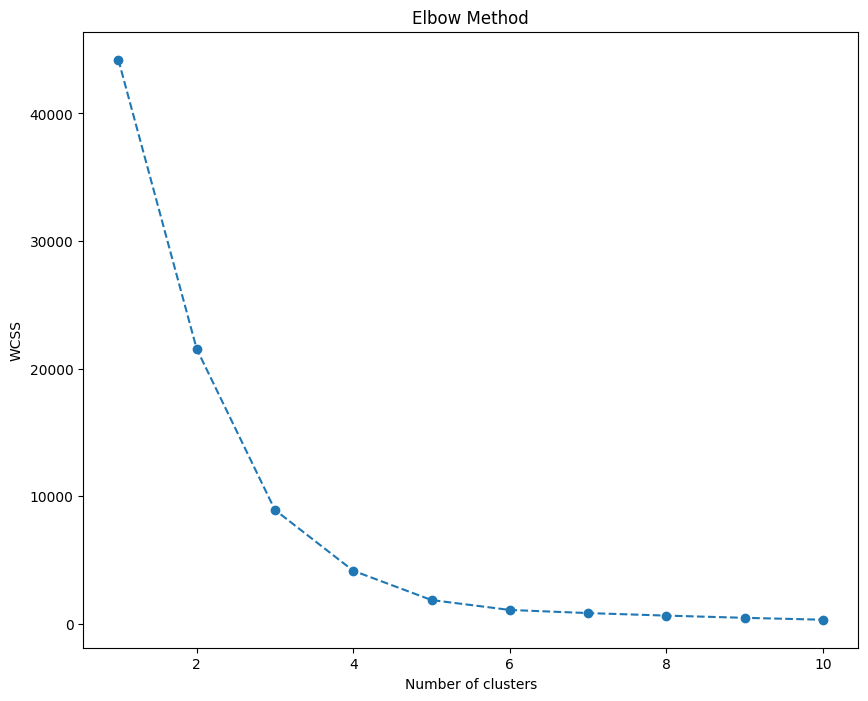

In [86]:
# Plot the WCSS to find the elbow
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [87]:
# Assuming the elbow is observed at 3 clusters (replace with the appropriate number)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
EC['cluster'] = kmeans.fit_predict(purchase_frequency_scaled)

In [88]:
# Inverse transform the centroids to the original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Centroids in the original 'purchase_frequency' scale:")
print(centroids)

Centroids in the original 'purchase_frequency' scale:
[[  3.39390289]
 [101.        ]
 [ 15.67475974]]


In [89]:
# Look at the distribution of customers over the clusters
cluster_distribution = EC['cluster'].value_counts()
print("Cluster distribution:")
print(cluster_distribution)

Cluster distribution:
cluster
0    38182
2     5931
1      101
Name: count, dtype: int64


In [90]:
print(EC.head())

     month order_name    customer_id variant_sku customer_cohort_month  total_sales  units_per_transaction  UnitPrice month_date customer_cohort_date  purchase_frequency  cluster
0  2023-10    #810617  6261751251059   SQ8862610               2022-10       694.43                      1      694.0 2023-10-01           2022-10-01                   1        0
1  2023-10    #810431  3496267448435   SQ1726938               2020-11        74.19                      1       74.0 2023-10-01           2020-11-01                  10        2
2  2023-10    #802622  5601422671987    BB738-24               2022-03        54.49                      1       54.0 2023-10-01           2022-03-01                   4        0
3  2023-10    #801731  6769237557363    BB727-26               2023-07        64.34                      1       64.0 2023-10-01           2023-07-01                   1        0
4  2023-10    #807669  6272794919027    BB944-24               2022-10        63.74                      

In [91]:
# For instance, assuming cluster 0 is 'loyal', 1 is 'new', and 2 is 'at risk'
cluster_labels = {
    0: 'loyal',
    1: 'new',
    2: 'at risk'
}
EC['cluster_label'] = EC['cluster'].map(cluster_labels)
print(EC[['customer_id', 'purchase_frequency', 'cluster', 'cluster_label']].head())

     customer_id  purchase_frequency  cluster cluster_label
0  6261751251059                   1        0         loyal
1  3496267448435                  10        2       at risk
2  5601422671987                   4        0         loyal
3  6769237557363                   1        0         loyal
4  6272794919027                   4        0         loyal


In [52]:
X= EC[['month','total_sales']]

In [53]:
# Fit the model to the data 'X' to find clusters

kmeans=KMeans(random_state=8)
kmeans.fit(X)

KMeans(random_state=8)

In [54]:
# for each sample (or data point) in the dataset X, the code will predict which cluster the sample is closest to
y_preds = kmeans.predict(X)
y_preds


array([2, 1, 1, ..., 5, 6, 3], dtype=int32)

**y_preds**= kmeans.predict(X): This line of code executes the prediction. The kmeans object, is now being used to assign each sample in X to one of the clusters it identified during the fit process.

**y_preds:** This is the variable where the predictions (cluster assignments) for each sample in X are stored.

**array**([2, 4, 0, ..., 2, 3, 0], dtype=int32): The output shows an array of integers where each integer represents the cluster number assigned to each sample in X. For example, the first sample has been assigned to cluster 2, the second to cluster 4, and so on. The ellipsis (...) indicates that the output is truncated, and there are more values in the array that are not displayed.

In [55]:
# Assign the cluster labels to a new column in the original DataFrame
EC['cluster'] = y_preds
EC.head()

,month,order_name,customer_id,variant_sku,customer_cohort_month,total_sales,units_per_transaction,UnitPrice,cluster
2,202310,#810617,6261751251059,SQ8862610,202210,498.934,1.0,498.0,2
3,202310,#810431,3496267448435,SQ1726938,202011,74.190,1.0,74.0,1
8,202310,#802622,5601422671987,BB738-24,202203,54.490,1.0,54.0,1
11,202310,#801731,6769237557363,BB727-26,202307,64.340,1.0,64.0,1
13,202310,#807669,6272794919027,BB944-24,202210,63.740,1.0,63.0,1


In [56]:
# pivot table to calculate the mean 'total_sales' and 'UnitPrice' for each cluster.
# This helps in understanding the average revenue and pricing per unit for each customer segment defined by the clusters.
EC.pivot_table(values=['month','total_sales'], index='cluster', aggfunc=np.mean)



,month,total_sales
cluster,,
0,202311.365824,172.834809
1,202311.087653,57.865910
2,202311.596181,485.268909
3,202401.678684,60.299087
4,202311.539018,309.570698
5,202401.551582,485.537730
6,202401.631486,173.208804
7,202401.632520,307.918065


**Cluster 0** This cluster has the lowest average unit price and total sales, could represent customers purchasing low-priced items or fewer items per transaction.

**Cluster 1**: both the unit price and total sales are moderate, suggesting these might be customers who purchase mid-range priced items or a moderate number of items.

**Cluster 2**: This cluster shows the highest averages for both unit price and total sales, indicating these are likely high-spending customers, possibly buying premium products or in larger quantities.

**Cluster 3**: Customers in this cluster have moderate-to-low unit price and total sales, possibly representing occasional shoppers or those purchasing necessities with consistent pricing.

**Cluster 4**: This group has low averages for unit price and total sales, similar to Cluster 0, possibly representing another segment of low-spending customers or those focusing on budget items.

**Cluster 5**: With moderately high unit prices and total sales, this cluster might be comprised of customers who make infrequent but significant purchases.

**Cluster 6**: Customers in this cluster have high unit prices and total sales, second only to Cluster 2, likely representing another segment of premium product buyers.

**Cluster 7**: This cluster has a moderate average unit price and total sales, indicating a customer segment that may focus on mid-tier products.

For targeted marketing or personalized offers, clusters 1 and 3 could be the focus for promoting high-value products, while strategies for clusters with lower average sales might focus on increasing transaction frequency or cross-selling to increase the number of units per transaction.








In [ ]:
import altair as alt

#set the data transformer to increase the maximum number of rows allowed
alt.data_transformers.disable_max_rows()

# Initialize an Altair Chart object with the 'EC' DataFrame as the data source for visualization.
# Altair is a declarative statistical visualization library for Python.
chart = alt.Chart(EC)

# Define a scatter plot by specifying the mark type as 'circle'. Each data point will be represented by a circle on the plot.
scatter_plot = chart.mark_circle()


# Encode the axes and color of the scatter plot.
# 'x' is set to 'total_sales', 'y' is set to 'UnitPrice', and color is determined by the 'cluster' column.
# The ':N' in 'cluster:N' indicates that the cluster is a nominal categorical variable for color encoding.
scatter_plot.encode(x='total_sales', y='UnitPrice', color='cluster:N')

The scatter plot shows a clear linear relationship between 'total_sales' on the X-axis and 'UnitPrice' on the Y-axis, with distinct colors for each of the eight clusters (0 to 7). Each cluster represents a group of customers with similar spending habits in terms of sales volume and unit price.

The linearity of the clusters from the bottom left to the top right suggests that as customers spend more (higher total sales), they also tend to buy more expensive items (higher unit price). There’s a gradient of spending behavior, with clusters at the bottom left representing lower spenders on cheaper items, and clusters at the top right representing higher spenders on more expensive items.

The color-coding indicates that the k-means algorithm has effectively grouped customers into distinct segments based on these two variables. This information could be used to tailor marketing strategies or to customize service offerings for each customer segment.

In [ ]:
# Encode the specified DataFrame columns as the axes and color of the plot.
# The x-axis represents 'total_sales', the y-axis 'UnitPrice', and the color represents different clusters.
# Tooltip is added to show more information about each point when hovered over in an interactive view.
scatter_plot = scatter_plot.encode(
    x='total_sales',
    y='UnitPrice',
    color='cluster:N',
    tooltip=['variant_sku', 'cluster', 'total_sales', 'UnitPrice']
).interactive()  # This makes the chart interactive, allowing for zooming and panning.
scatter_plot

In [ ]:
# ? before or after a function or object and executing the cell
# displays the documentation for that object
?kmeans

In [ ]:
# Set the index to customer_id
clv.set_index('customer_id', inplace=True)

# Standardize the data before applying KMeans
scaler = StandardScaler()
scaled_clv = scaler.fit_transform(clv)

# Determine the optimal number of clusters using elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(scaled_clv)        # Fit the data to the visualizer
visualizer.show()                 # Finalize and render the figure

# Store the optimal number of clusters
optimal_clusters = visualizer.elbow_value_

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(scaled_clv)

# Add the cluster labels to the dataframe
clv['cluster'] = kmeans.labels_

# Visualize the RFM segments
plt.figure(figsize=(10, 8))

# We'll create scatter plots for each pair of RFM values and color by cluster
for i, (x_col, y_col) in enumerate([('recency', 'frequency'), ('recency', 'monetary_value'), ('frequency', 'monetary_value')]):
    plt.subplot(2, 2, i+1)
    plt.scatter(clv[x_col], clv[y_col], c=clv['cluster'], cmap='viridis', label=f'Cluster {clv["cluster"]}')
    plt.title(f'{x_col.capitalize()} vs {y_col.capitalize()}')
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())
    plt.legend()

plt.tight_layout()
plt.show()

# Save the figure to a file so we can display it to the user
output_file = '/mnt/data/rfm_clusters.png'
plt.savefig(output_file)

# Return the path of the saved file
output_file
